In [1]:
import json
import math
import random
import copy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
f = open('dataset.json', 'r', encoding='UTF-8')
data = json.loads(f.read())

In [3]:
def preprocess(data, max_items=30):
    def get_population(item):
        try:
            return int(item['Население'])
        except ValueError:
            return -1
    data_sorted = sorted(data, key=get_population, reverse=True)[:30]
    data_new = []
    for item in data_sorted:
        if len(item['Город']) == 0:
            item['Город'] = item['Регион']
        data_new.append((item['Город'], item['Широта'], item['Долгота']))
    return data_new

In [4]:
data_preprocessed = preprocess(data)

In [5]:
class SimulatedAnnealing2:
    def __init__(self, data, init_T, annealing_rate):
        self.data = copy.deepcopy(data)
        self.back_data = copy.deepcopy(data)
        self.init_T = init_T
        self.annealing_rate = annealing_rate
        
    def deg_to_rad(self, deg):
        return deg * math.pi / 180
        
    def distance(self, a_lat, a_lon, b_lat, b_lon):
        R = 6371e3
        a_rad = self.deg_to_rad(a_lat)
        b_rad = self.deg_to_rad(b_lat)
        a_rad_lon = self.deg_to_rad(a_lon)
        b_rad_lon = self.deg_to_rad(b_lon)
        cos_d = math.sin(a_rad) * math.sin(b_rad) + math.cos(a_rad) * math.cos(b_rad) * math.cos(a_rad_lon - b_rad_lon)
        d = math.acos(cos_d)
        d = d * R
        return d
    
    def total_distance(self):
        total = 0
        for i in range(len(self.data)):
            if i == len(self.data) - 1:
                a_city = self.data[i]
                b_city = self.data[0]
            else:
                a_city = self.data[i]
                b_city = self.data[i+1]
            total += self.distance(float(a_city[1]), float(a_city[2]), float(b_city[1]), float(b_city[2]))
        return total
        
    def swap_two_cities(self):
        a = random.randint(0, len(self.data)-1)
        b = random.randint(0, len(self.data)-1)
        temp = self.data[a]
        self.data[a] = self.data[b]
        self.data[b] = temp
        
    def run(self):
        energy = self.total_distance()
        T = self.init_T
        i = 0
        while T >= 4e-4:
            if i >= 30000:
                break
            self.swap_two_cities()
            new_energy = self.total_distance()
            if new_energy <= energy:
                self.back_data = copy.deepcopy(self.data)
                energy = new_energy
            else:
                p = math.exp((energy - new_energy) / T)
                if p > random.random():
                    self.back_data = copy.deepcopy(self.data)
                    energy = new_energy
                else:
                    self.data = copy.deepcopy(self.back_data)
                  
            print(f'Iteration: {i}, T = {T}, Energy = {energy}')
            i += 1
            T = self.init_T * self.annealing_rate / i
        
        return self.back_data

In [17]:
sa = SimulatedAnnealing2(data_preprocessed, 500, 0.9)
best_data = sa.run()

Iteration: 0, T = 500, Energy = 65169096.756324895
Iteration: 1, T = 450.0, Energy = 65169096.756324895
Iteration: 2, T = 225.0, Energy = 62663508.96225524
Iteration: 3, T = 150.0, Energy = 62663508.96225524
Iteration: 4, T = 112.5, Energy = 62663508.96225524
Iteration: 5, T = 90.0, Energy = 62663508.96225524
Iteration: 6, T = 75.0, Energy = 60956541.94773197
Iteration: 7, T = 64.28571428571429, Energy = 60956541.94773197
Iteration: 8, T = 56.25, Energy = 60956541.94773197
Iteration: 9, T = 50.0, Energy = 60956541.94773197
Iteration: 10, T = 45.0, Energy = 60888023.59975362
Iteration: 11, T = 40.90909090909091, Energy = 55209169.44647587
Iteration: 12, T = 37.5, Energy = 55209169.44647587
Iteration: 13, T = 34.61538461538461, Energy = 55206776.793104894
Iteration: 14, T = 32.142857142857146, Energy = 51802723.70911493
Iteration: 15, T = 30.0, Energy = 51802723.70911493
Iteration: 16, T = 28.125, Energy = 51802723.70911493
Iteration: 17, T = 26.470588235294116, Energy = 51802723.7091149

Iteration: 884, T = 0.5090497737556561, Energy = 19410664.577975404
Iteration: 885, T = 0.5084745762711864, Energy = 19410664.577975404
Iteration: 886, T = 0.5079006772009029, Energy = 19410664.577975404
Iteration: 887, T = 0.5073280721533259, Energy = 19410664.577975404
Iteration: 888, T = 0.5067567567567568, Energy = 19410664.577975404
Iteration: 889, T = 0.5061867266591676, Energy = 19410664.577975404
Iteration: 890, T = 0.5056179775280899, Energy = 19410664.577975404
Iteration: 891, T = 0.5050505050505051, Energy = 19410664.577975404
Iteration: 892, T = 0.5044843049327354, Energy = 19410664.577975404
Iteration: 893, T = 0.503919372900336, Energy = 19410664.577975404
Iteration: 894, T = 0.5033557046979866, Energy = 19410664.577975404
Iteration: 895, T = 0.5027932960893855, Energy = 19410664.577975404
Iteration: 896, T = 0.5022321428571429, Energy = 19410664.577975404
Iteration: 897, T = 0.5016722408026756, Energy = 19410664.577975404
Iteration: 898, T = 0.5011135857461024, Energy = 

Iteration: 1487, T = 0.3026227303295225, Energy = 19099245.80994452
Iteration: 1488, T = 0.3024193548387097, Energy = 19099245.80994452
Iteration: 1489, T = 0.3022162525184688, Energy = 19099245.80994452
Iteration: 1490, T = 0.30201342281879195, Energy = 19099245.80994452
Iteration: 1491, T = 0.30181086519114686, Energy = 19099245.80994452
Iteration: 1492, T = 0.30160857908847183, Energy = 19099245.80994452
Iteration: 1493, T = 0.3014065639651708, Energy = 19099245.80994452
Iteration: 1494, T = 0.30120481927710846, Energy = 19099245.80994452
Iteration: 1495, T = 0.3010033444816054, Energy = 19099245.80994452
Iteration: 1496, T = 0.30080213903743314, Energy = 19099245.80994452
Iteration: 1497, T = 0.30060120240480964, Energy = 19099245.80994452
Iteration: 1498, T = 0.30040053404539385, Energy = 19099245.80994452
Iteration: 1499, T = 0.3002001334222815, Energy = 19099245.80994452
Iteration: 1500, T = 0.3, Energy = 19099245.80994452
Iteration: 1501, T = 0.29980013324450366, Energy = 19099

Iteration: 2148, T = 0.20949720670391062, Energy = 19099245.80994452
Iteration: 2149, T = 0.20939972080037228, Energy = 19099245.80994452
Iteration: 2150, T = 0.20930232558139536, Energy = 19099245.80994452
Iteration: 2151, T = 0.20920502092050208, Energy = 19099245.80994452
Iteration: 2152, T = 0.20910780669144982, Energy = 19099245.80994452
Iteration: 2153, T = 0.20901068276823037, Energy = 19099245.80994452
Iteration: 2154, T = 0.20891364902506965, Energy = 19099245.80994452
Iteration: 2155, T = 0.2088167053364269, Energy = 19099245.80994452
Iteration: 2156, T = 0.20871985157699444, Energy = 19099245.80994452
Iteration: 2157, T = 0.2086230876216968, Energy = 19099245.80994452
Iteration: 2158, T = 0.20852641334569044, Energy = 19099245.80994452
Iteration: 2159, T = 0.20842982862436313, Energy = 19099245.80994452
Iteration: 2160, T = 0.20833333333333334, Energy = 19099245.80994452
Iteration: 2161, T = 0.20823692734844979, Energy = 19099245.80994452
Iteration: 2162, T = 0.2081406105457

Iteration: 2698, T = 0.16679021497405486, Energy = 19099245.80994452
Iteration: 2699, T = 0.16672841793256762, Energy = 19099245.80994452
Iteration: 2700, T = 0.16666666666666666, Energy = 19099245.80994452
Iteration: 2701, T = 0.16660496112550907, Energy = 19099245.80994452
Iteration: 2702, T = 0.16654330125832717, Energy = 19099245.80994452
Iteration: 2703, T = 0.16648168701442842, Energy = 19099245.80994452
Iteration: 2704, T = 0.16642011834319526, Energy = 19099245.80994452
Iteration: 2705, T = 0.16635859519408502, Energy = 19099245.80994452
Iteration: 2706, T = 0.1662971175166297, Energy = 19099245.80994452
Iteration: 2707, T = 0.16623568526043592, Energy = 19099245.80994452
Iteration: 2708, T = 0.16617429837518463, Energy = 19099245.80994452
Iteration: 2709, T = 0.16611295681063123, Energy = 19099245.80994452
Iteration: 2710, T = 0.16605166051660517, Energy = 19099245.80994452
Iteration: 2711, T = 0.16599040944300997, Energy = 19099245.80994452
Iteration: 2712, T = 0.165929203539

Iteration: 3697, T = 0.12172031376791993, Energy = 19099245.80994452
Iteration: 3698, T = 0.12168739859383451, Energy = 19099245.80994452
Iteration: 3699, T = 0.12165450121654502, Energy = 19099245.80994452
Iteration: 3700, T = 0.12162162162162163, Energy = 19099245.80994452
Iteration: 3701, T = 0.1215887597946501, Energy = 19099245.80994452
Iteration: 3702, T = 0.12155591572123177, Energy = 19099245.80994452
Iteration: 3703, T = 0.12152308938698353, Energy = 19099245.80994452
Iteration: 3704, T = 0.12149028077753779, Energy = 19099245.80994452
Iteration: 3705, T = 0.1214574898785425, Energy = 19099245.80994452
Iteration: 3706, T = 0.12142471667566108, Energy = 19099245.80994452
Iteration: 3707, T = 0.12139196115457243, Energy = 19099245.80994452
Iteration: 3708, T = 0.12135922330097088, Energy = 19099245.80994452
Iteration: 3709, T = 0.1213265031005662, Energy = 19099245.80994452
Iteration: 3710, T = 0.12129380053908356, Energy = 19099245.80994452
Iteration: 3711, T = 0.12126111560226

Iteration: 4369, T = 0.10299839780270084, Energy = 19099245.80994452
Iteration: 4370, T = 0.10297482837528604, Energy = 19099245.80994452
Iteration: 4371, T = 0.1029512697323267, Energy = 19099245.80994452
Iteration: 4372, T = 0.10292772186642268, Energy = 19099245.80994452
Iteration: 4373, T = 0.10290418477018065, Energy = 19099245.80994452
Iteration: 4374, T = 0.102880658436214, Energy = 19099245.80994452
Iteration: 4375, T = 0.10285714285714286, Energy = 19099245.80994452
Iteration: 4376, T = 0.10283363802559416, Energy = 19099245.80994452
Iteration: 4377, T = 0.10281014393420151, Energy = 19099245.80994452
Iteration: 4378, T = 0.1027866605756053, Energy = 19099245.80994452
Iteration: 4379, T = 0.10276318794245261, Energy = 19099245.80994452
Iteration: 4380, T = 0.10273972602739725, Energy = 19099245.80994452
Iteration: 4381, T = 0.10271627482309975, Energy = 19099245.80994452
Iteration: 4382, T = 0.1026928343222273, Energy = 19099245.80994452
Iteration: 4383, T = 0.1026694045174538

Iteration: 5196, T = 0.08660508083140878, Energy = 19099245.80994452
Iteration: 5197, T = 0.0865884163940735, Energy = 19099245.80994452
Iteration: 5198, T = 0.08657175836860331, Energy = 19099245.80994452
Iteration: 5199, T = 0.08655510675129832, Energy = 19099245.80994452
Iteration: 5200, T = 0.08653846153846154, Energy = 19099245.80994452
Iteration: 5201, T = 0.08652182272639877, Energy = 19099245.80994452
Iteration: 5202, T = 0.08650519031141868, Energy = 19099245.80994452
Iteration: 5203, T = 0.08648856428983279, Energy = 19099245.80994452
Iteration: 5204, T = 0.08647194465795542, Energy = 19099245.80994452
Iteration: 5205, T = 0.08645533141210375, Energy = 19099245.80994452
Iteration: 5206, T = 0.08643872454859777, Energy = 19099245.80994452
Iteration: 5207, T = 0.08642212406376032, Energy = 19099245.80994452
Iteration: 5208, T = 0.08640552995391705, Energy = 19099245.80994452
Iteration: 5209, T = 0.08638894221539643, Energy = 19099245.80994452
Iteration: 5210, T = 0.086372360844

Iteration: 5819, T = 0.07733287506444406, Energy = 19099245.80994452
Iteration: 5820, T = 0.07731958762886598, Energy = 19099245.80994452
Iteration: 5821, T = 0.07730630475863254, Energy = 19099245.80994452
Iteration: 5822, T = 0.07729302645139127, Energy = 19099245.80994452
Iteration: 5823, T = 0.07727975270479134, Energy = 19099245.80994452
Iteration: 5824, T = 0.07726648351648352, Energy = 19099245.80994452
Iteration: 5825, T = 0.07725321888412018, Energy = 19099245.80994452
Iteration: 5826, T = 0.07723995880535531, Energy = 19099245.80994452
Iteration: 5827, T = 0.07722670327784452, Energy = 19099245.80994452
Iteration: 5828, T = 0.07721345229924502, Energy = 19099245.80994452
Iteration: 5829, T = 0.07720020586721564, Energy = 19099245.80994452
Iteration: 5830, T = 0.07718696397941681, Energy = 19099245.80994452
Iteration: 5831, T = 0.07717372663351055, Energy = 19099245.80994452
Iteration: 5832, T = 0.07716049382716049, Energy = 19099245.80994452
Iteration: 5833, T = 0.07714726555

Iteration: 6450, T = 0.06976744186046512, Energy = 19099245.80994452
Iteration: 6451, T = 0.06975662687955356, Energy = 19099245.80994452
Iteration: 6452, T = 0.06974581525108493, Energy = 19099245.80994452
Iteration: 6453, T = 0.0697350069735007, Energy = 19099245.80994452
Iteration: 6454, T = 0.06972420204524327, Energy = 19099245.80994452
Iteration: 6455, T = 0.069713400464756, Energy = 19099245.80994452
Iteration: 6456, T = 0.06970260223048327, Energy = 19099245.80994452
Iteration: 6457, T = 0.06969180734087037, Energy = 19099245.80994452
Iteration: 6458, T = 0.06968101579436357, Energy = 19099245.80994452
Iteration: 6459, T = 0.06967022758941012, Energy = 19099245.80994452
Iteration: 6460, T = 0.0696594427244582, Energy = 19099245.80994452
Iteration: 6461, T = 0.06964866119795697, Energy = 19099245.80994452
Iteration: 6462, T = 0.06963788300835655, Energy = 19099245.80994452
Iteration: 6463, T = 0.069627108154108, Energy = 19099245.80994452
Iteration: 6464, T = 0.06961633663366337

Iteration: 7195, T = 0.06254343293954134, Energy = 19099245.80994452
Iteration: 7196, T = 0.06253474152306837, Energy = 19099245.80994452
Iteration: 7197, T = 0.06252605252188412, Energy = 19099245.80994452
Iteration: 7198, T = 0.06251736593498194, Energy = 19099245.80994452
Iteration: 7199, T = 0.06250868176135574, Energy = 19099245.80994452
Iteration: 7200, T = 0.0625, Energy = 19099245.80994452
Iteration: 7201, T = 0.06249132064990973, Energy = 19099245.80994452
Iteration: 7202, T = 0.062482643710080533, Energy = 19099245.80994452
Iteration: 7203, T = 0.06247396917950854, Energy = 19099245.80994452
Iteration: 7204, T = 0.06246529705719045, Energy = 19099245.80994452
Iteration: 7205, T = 0.062456627342123525, Energy = 19099245.80994452
Iteration: 7206, T = 0.06244796003330558, Energy = 19099245.80994452
Iteration: 7207, T = 0.06243929512973498, Energy = 19099245.80994452
Iteration: 7208, T = 0.062430632630410654, Energy = 19099245.80994452
Iteration: 7209, T = 0.062421972534332085, E

Iteration: 7916, T = 0.05684689236988378, Energy = 19099245.80994452
Iteration: 7917, T = 0.05683971201212581, Energy = 19099245.80994452
Iteration: 7918, T = 0.05683253346804749, Energy = 19099245.80994452
Iteration: 7919, T = 0.056825356736961735, Energy = 19099245.80994452
Iteration: 7920, T = 0.056818181818181816, Energy = 19099245.80994452
Iteration: 7921, T = 0.056811008711021335, Energy = 19099245.80994452
Iteration: 7922, T = 0.056803837414794243, Energy = 19099245.80994452
Iteration: 7923, T = 0.05679666792881484, Energy = 19099245.80994452
Iteration: 7924, T = 0.056789500252397776, Energy = 19099245.80994452
Iteration: 7925, T = 0.056782334384858045, Energy = 19099245.80994452
Iteration: 7926, T = 0.05677517032551098, Energy = 19099245.80994452
Iteration: 7927, T = 0.05676800807367226, Energy = 19099245.80994452
Iteration: 7928, T = 0.05676084762865792, Energy = 19099245.80994452
Iteration: 7929, T = 0.056753688989784334, Energy = 19099245.80994452
Iteration: 7930, T = 0.0567

Iteration: 8656, T = 0.05198706099815157, Energy = 19099245.80994452
Iteration: 8657, T = 0.051981055792999886, Energy = 19099245.80994452
Iteration: 8658, T = 0.05197505197505198, Energy = 19099245.80994452
Iteration: 8659, T = 0.05196904954382723, Energy = 19099245.80994452
Iteration: 8660, T = 0.05196304849884527, Energy = 19099245.80994452
Iteration: 8661, T = 0.05195704883962591, Energy = 19099245.80994452
Iteration: 8662, T = 0.051951050565689216, Energy = 19099245.80994452
Iteration: 8663, T = 0.05194505367655546, Energy = 19099245.80994452
Iteration: 8664, T = 0.05193905817174515, Energy = 19099245.80994452
Iteration: 8665, T = 0.05193306405077899, Energy = 19099245.80994452
Iteration: 8666, T = 0.05192707131317794, Energy = 19099245.80994452
Iteration: 8667, T = 0.05192107995846314, Energy = 19099245.80994452
Iteration: 8668, T = 0.051915089986155974, Energy = 19099245.80994452
Iteration: 8669, T = 0.05190910139577806, Energy = 19099245.80994452
Iteration: 8670, T = 0.05190311

Iteration: 9276, T = 0.04851228978007762, Energy = 19099245.80994452
Iteration: 9277, T = 0.04850706047213539, Energy = 19099245.80994452
Iteration: 9278, T = 0.04850183229144212, Energy = 19099245.80994452
Iteration: 9279, T = 0.04849660523763336, Energy = 19099245.80994452
Iteration: 9280, T = 0.04849137931034483, Energy = 19099245.80994452
Iteration: 9281, T = 0.04848615450921237, Energy = 19099245.80994452
Iteration: 9282, T = 0.04848093083387201, Energy = 19099245.80994452
Iteration: 9283, T = 0.048475708283959924, Energy = 19099245.80994452
Iteration: 9284, T = 0.048470486859112455, Energy = 19099245.80994452
Iteration: 9285, T = 0.048465266558966075, Energy = 19099245.80994452
Iteration: 9286, T = 0.04846004738315744, Energy = 19099245.80994452
Iteration: 9287, T = 0.048454829331323356, Energy = 19099245.80994452
Iteration: 9288, T = 0.04844961240310078, Energy = 19099245.80994452
Iteration: 9289, T = 0.04844439659812682, Energy = 19099245.80994452
Iteration: 9290, T = 0.0484391

Iteration: 10075, T = 0.04466501240694789, Energy = 19099245.80994452
Iteration: 10076, T = 0.04466057959507741, Energy = 19099245.80994452
Iteration: 10077, T = 0.04465614766299494, Energy = 19099245.80994452
Iteration: 10078, T = 0.044651716610438576, Energy = 19099245.80994452
Iteration: 10079, T = 0.04464728643714654, Energy = 19099245.80994452
Iteration: 10080, T = 0.044642857142857144, Energy = 19099245.80994452
Iteration: 10081, T = 0.0446384287273088, Energy = 19099245.80994452
Iteration: 10082, T = 0.04463400119024003, Energy = 19099245.80994452
Iteration: 10083, T = 0.044629574531389465, Energy = 19099245.80994452
Iteration: 10084, T = 0.044625148750495836, Energy = 19099245.80994452
Iteration: 10085, T = 0.04462072384729797, Energy = 19099245.80994452
Iteration: 10086, T = 0.044616299821534804, Energy = 19099245.80994452
Iteration: 10087, T = 0.044611876672945375, Energy = 19099245.80994452
Iteration: 10088, T = 0.044607454401268835, Energy = 19099245.80994452
Iteration: 100

Iteration: 10692, T = 0.04208754208754209, Energy = 19099245.80994452
Iteration: 10693, T = 0.04208360609744693, Energy = 19099245.80994452
Iteration: 10694, T = 0.042079670843463625, Energy = 19099245.80994452
Iteration: 10695, T = 0.04207573632538569, Energy = 19099245.80994452
Iteration: 10696, T = 0.04207180254300673, Energy = 19099245.80994452
Iteration: 10697, T = 0.04206786949612041, Energy = 19099245.80994452
Iteration: 10698, T = 0.04206393718452047, Energy = 19099245.80994452
Iteration: 10699, T = 0.042060005608000745, Energy = 19099245.80994452
Iteration: 10700, T = 0.04205607476635514, Energy = 19099245.80994452
Iteration: 10701, T = 0.04205214465937763, Energy = 19099245.80994452
Iteration: 10702, T = 0.04204821528686227, Energy = 19099245.80994452
Iteration: 10703, T = 0.04204428664860319, Energy = 19099245.80994452
Iteration: 10704, T = 0.04204035874439462, Energy = 19099245.80994452
Iteration: 10705, T = 0.04203643157403083, Energy = 19099245.80994452
Iteration: 10706, 

Iteration: 11652, T = 0.038619979402677654, Energy = 19099245.80994452
Iteration: 11653, T = 0.03861666523641981, Energy = 19099245.80994452
Iteration: 11654, T = 0.03861335163892226, Energy = 19099245.80994452
Iteration: 11655, T = 0.03861003861003861, Energy = 19099245.80994452
Iteration: 11656, T = 0.03860672614962251, Energy = 19099245.80994452
Iteration: 11657, T = 0.03860341425752767, Energy = 19099245.80994452
Iteration: 11658, T = 0.03860010293360782, Energy = 19099245.80994452
Iteration: 11659, T = 0.038596792177716784, Energy = 19099245.80994452
Iteration: 11660, T = 0.038593481989708404, Energy = 19099245.80994452
Iteration: 11661, T = 0.038590172369436584, Energy = 19099245.80994452
Iteration: 11662, T = 0.038586863316755274, Energy = 19099245.80994452
Iteration: 11663, T = 0.03858355483151848, Energy = 19099245.80994452
Iteration: 11664, T = 0.038580246913580245, Energy = 19099245.80994452
Iteration: 11665, T = 0.03857693956279468, Energy = 19099245.80994452
Iteration: 116

Iteration: 12191, T = 0.03691247641702895, Energy = 19099245.80994452
Iteration: 12192, T = 0.036909448818897635, Energy = 19099245.80994452
Iteration: 12193, T = 0.036906421717378825, Energy = 19099245.80994452
Iteration: 12194, T = 0.036903395112350336, Energy = 19099245.80994452
Iteration: 12195, T = 0.03690036900369004, Energy = 19099245.80994452
Iteration: 12196, T = 0.03689734339127583, Energy = 19099245.80994452
Iteration: 12197, T = 0.036894318274985655, Energy = 19099245.80994452
Iteration: 12198, T = 0.03689129365469749, Energy = 19099245.80994452
Iteration: 12199, T = 0.03688826953028937, Energy = 19099245.80994452
Iteration: 12200, T = 0.036885245901639344, Energy = 19099245.80994452
Iteration: 12201, T = 0.036882222768625524, Energy = 19099245.80994452
Iteration: 12202, T = 0.03687920013112604, Energy = 19099245.80994452
Iteration: 12203, T = 0.03687617798901909, Energy = 19099245.80994452
Iteration: 12204, T = 0.03687315634218289, Energy = 19099245.80994452
Iteration: 122

Iteration: 13007, T = 0.03459675559314215, Energy = 19099245.80994452
Iteration: 13008, T = 0.03459409594095941, Energy = 19099245.80994452
Iteration: 13009, T = 0.03459143669767084, Energy = 19099245.80994452
Iteration: 13010, T = 0.034588777863182166, Energy = 19099245.80994452
Iteration: 13011, T = 0.03458611943739912, Energy = 19099245.80994452
Iteration: 13012, T = 0.03458346142022748, Energy = 19099245.80994452
Iteration: 13013, T = 0.034580803811573045, Energy = 19099245.80994452
Iteration: 13014, T = 0.034578146611341634, Energy = 19099245.80994452
Iteration: 13015, T = 0.03457548981943911, Energy = 19099245.80994452
Iteration: 13016, T = 0.03457283343577136, Energy = 19099245.80994452
Iteration: 13017, T = 0.034570177460244295, Energy = 19099245.80994452
Iteration: 13018, T = 0.03456752189276387, Energy = 19099245.80994452
Iteration: 13019, T = 0.03456486673323604, Energy = 19099245.80994452
Iteration: 13020, T = 0.03456221198156682, Energy = 19099245.80994452
Iteration: 13021

Iteration: 13690, T = 0.03287070854638422, Energy = 19099245.80994452
Iteration: 13691, T = 0.03286830764735958, Energy = 19099245.80994452
Iteration: 13692, T = 0.03286590709903593, Energy = 19099245.80994452
Iteration: 13693, T = 0.03286350690133645, Energy = 19099245.80994452
Iteration: 13694, T = 0.03286110705418432, Energy = 19099245.80994452
Iteration: 13695, T = 0.03285870755750274, Energy = 19099245.80994452
Iteration: 13696, T = 0.03285630841121495, Energy = 19099245.80994452
Iteration: 13697, T = 0.03285390961524422, Energy = 19099245.80994452
Iteration: 13698, T = 0.0328515111695138, Energy = 19099245.80994452
Iteration: 13699, T = 0.032849113073947, Energy = 19099245.80994452
Iteration: 13700, T = 0.032846715328467155, Energy = 19099245.80994452
Iteration: 13701, T = 0.032844317932997594, Energy = 19099245.80994452
Iteration: 13702, T = 0.032841920887461684, Energy = 19099245.80994452
Iteration: 13703, T = 0.03283952419178282, Energy = 19099245.80994452
Iteration: 13704, T 

Iteration: 14491, T = 0.031053757504658063, Energy = 19099245.80994452
Iteration: 14492, T = 0.031051614683963565, Energy = 19099245.80994452
Iteration: 14493, T = 0.031049472158973298, Energy = 19099245.80994452
Iteration: 14494, T = 0.03104732992962605, Energy = 19099245.80994452
Iteration: 14495, T = 0.031045187995860642, Energy = 19099245.80994452
Iteration: 14496, T = 0.031043046357615893, Energy = 19099245.80994452
Iteration: 14497, T = 0.031040905014830655, Energy = 19099245.80994452
Iteration: 14498, T = 0.031038763967443785, Energy = 19099245.80994452
Iteration: 14499, T = 0.031036623215394164, Energy = 19099245.80994452
Iteration: 14500, T = 0.03103448275862069, Energy = 19099245.80994452
Iteration: 14501, T = 0.031032342597062272, Energy = 19099245.80994452
Iteration: 14502, T = 0.03103020273065784, Energy = 19099245.80994452
Iteration: 14503, T = 0.031028063159346343, Energy = 19099245.80994452
Iteration: 14504, T = 0.03102592388306674, Energy = 19099245.80994452
Iteration:

Iteration: 15189, T = 0.02962670353545329, Energy = 19099245.80994452
Iteration: 15190, T = 0.029624753127057275, Energy = 19099245.80994452
Iteration: 15191, T = 0.029622802975445988, Energy = 19099245.80994452
Iteration: 15192, T = 0.02962085308056872, Energy = 19099245.80994452
Iteration: 15193, T = 0.029618903442374778, Energy = 19099245.80994452
Iteration: 15194, T = 0.02961695406081348, Energy = 19099245.80994452
Iteration: 15195, T = 0.029615004935834157, Energy = 19099245.80994452
Iteration: 15196, T = 0.029613056067386154, Energy = 19099245.80994452
Iteration: 15197, T = 0.029611107455418832, Energy = 19099245.80994452
Iteration: 15198, T = 0.029609159099881564, Energy = 19099245.80994452
Iteration: 15199, T = 0.02960721100072373, Energy = 19099245.80994452
Iteration: 15200, T = 0.029605263157894735, Energy = 19099245.80994452
Iteration: 15201, T = 0.02960331557134399, Energy = 19099245.80994452
Iteration: 15202, T = 0.029601368241020918, Energy = 19099245.80994452
Iteration: 

Iteration: 16064, T = 0.028012948207171314, Energy = 19099245.80994452
Iteration: 16065, T = 0.028011204481792718, Energy = 19099245.80994452
Iteration: 16066, T = 0.028009460973484376, Energy = 19099245.80994452
Iteration: 16067, T = 0.028007717682205762, Energy = 19099245.80994452
Iteration: 16068, T = 0.028005974607916356, Energy = 19099245.80994452
Iteration: 16069, T = 0.028004231750575644, Energy = 19099245.80994452
Iteration: 16070, T = 0.028002489110143122, Energy = 19099245.80994452
Iteration: 16071, T = 0.028000746686578308, Energy = 19099245.80994452
Iteration: 16072, T = 0.027999004479840717, Energy = 19099245.80994452
Iteration: 16073, T = 0.027997262489889877, Energy = 19099245.80994452
Iteration: 16074, T = 0.027995520716685332, Energy = 19099245.80994452
Iteration: 16075, T = 0.027993779160186624, Energy = 19099245.80994452
Iteration: 16076, T = 0.02799203782035332, Energy = 19099245.80994452
Iteration: 16077, T = 0.02799029669714499, Energy = 19099245.80994452
Iteratio

Iteration: 16688, T = 0.026965484180249282, Energy = 19099245.80994452
Iteration: 16689, T = 0.026963868416322128, Energy = 19099245.80994452
Iteration: 16690, T = 0.02696225284601558, Energy = 19099245.80994452
Iteration: 16691, T = 0.02696063746929483, Energy = 19099245.80994452
Iteration: 16692, T = 0.02695902228612509, Energy = 19099245.80994452
Iteration: 16693, T = 0.026957407296471576, Energy = 19099245.80994452
Iteration: 16694, T = 0.02695579250029951, Energy = 19099245.80994452
Iteration: 16695, T = 0.026954177897574125, Energy = 19099245.80994452
Iteration: 16696, T = 0.02695256348826066, Energy = 19099245.80994452
Iteration: 16697, T = 0.02695094927232437, Energy = 19099245.80994452
Iteration: 16698, T = 0.026949335249730505, Energy = 19099245.80994452
Iteration: 16699, T = 0.026947721420444336, Energy = 19099245.80994452
Iteration: 16700, T = 0.02694610778443114, Energy = 19099245.80994452
Iteration: 16701, T = 0.02694449434165619, Energy = 19099245.80994452
Iteration: 167

Iteration: 17563, T = 0.025622046347434948, Energy = 19099245.80994452
Iteration: 17564, T = 0.025620587565474834, Energy = 19099245.80994452
Iteration: 17565, T = 0.025619128949615714, Energy = 19099245.80994452
Iteration: 17566, T = 0.025617670499829215, Energy = 19099245.80994452
Iteration: 17567, T = 0.02561621221608698, Energy = 19099245.80994452
Iteration: 17568, T = 0.025614754098360656, Energy = 19099245.80994452
Iteration: 17569, T = 0.025613296146621892, Energy = 19099245.80994452
Iteration: 17570, T = 0.025611838360842343, Energy = 19099245.80994452
Iteration: 17571, T = 0.02561038074099368, Energy = 19099245.80994452
Iteration: 17572, T = 0.025608923287047575, Energy = 19099245.80994452
Iteration: 17573, T = 0.0256074659989757, Energy = 19099245.80994452
Iteration: 17574, T = 0.025606008876749745, Energy = 19099245.80994452
Iteration: 17575, T = 0.025604551920341393, Energy = 19099245.80994452
Iteration: 17576, T = 0.02560309512972235, Energy = 19099245.80994452
Iteration: 

Iteration: 18187, T = 0.024742948259745972, Energy = 19099245.80994452
Iteration: 18188, T = 0.024741587860127555, Energy = 19099245.80994452
Iteration: 18189, T = 0.024740227610094014, Energy = 19099245.80994452
Iteration: 18190, T = 0.02473886750962067, Energy = 19099245.80994452
Iteration: 18191, T = 0.024737507558682866, Energy = 19099245.80994452
Iteration: 18192, T = 0.024736147757255935, Energy = 19099245.80994452
Iteration: 18193, T = 0.024734788105315233, Energy = 19099245.80994452
Iteration: 18194, T = 0.0247334286028361, Energy = 19099245.80994452
Iteration: 18195, T = 0.0247320692497939, Energy = 19099245.80994452
Iteration: 18196, T = 0.024730710046163992, Energy = 19099245.80994452
Iteration: 18197, T = 0.024729350991921747, Energy = 19099245.80994452
Iteration: 18198, T = 0.024727992087042534, Energy = 19099245.80994452
Iteration: 18199, T = 0.02472663333150173, Energy = 19099245.80994452
Iteration: 18200, T = 0.024725274725274724, Energy = 19099245.80994452
Iteration: 1

Iteration: 19166, T = 0.02347907753313159, Energy = 19099245.80994452
Iteration: 19167, T = 0.023477852559085927, Energy = 19099245.80994452
Iteration: 19168, T = 0.023476627712854758, Energy = 19099245.80994452
Iteration: 19169, T = 0.02347540299441807, Energy = 19099245.80994452
Iteration: 19170, T = 0.023474178403755867, Energy = 19099245.80994452
Iteration: 19171, T = 0.023472953940848158, Energy = 19099245.80994452
Iteration: 19172, T = 0.02347172960567494, Energy = 19099245.80994452
Iteration: 19173, T = 0.02347050539821624, Energy = 19099245.80994452
Iteration: 19174, T = 0.023469281318452072, Energy = 19099245.80994452
Iteration: 19175, T = 0.02346805736636245, Energy = 19099245.80994452
Iteration: 19176, T = 0.02346683354192741, Energy = 19099245.80994452
Iteration: 19177, T = 0.023465609845126974, Energy = 19099245.80994452
Iteration: 19178, T = 0.023464386275941183, Energy = 19099245.80994452
Iteration: 19179, T = 0.02346316283435007, Energy = 19099245.80994452
Iteration: 19

Iteration: 20120, T = 0.022365805168986085, Energy = 19099245.80994452
Iteration: 20121, T = 0.022364693603697628, Energy = 19099245.80994452
Iteration: 20122, T = 0.02236358214889176, Energy = 19099245.80994452
Iteration: 20123, T = 0.022362470804552004, Energy = 19099245.80994452
Iteration: 20124, T = 0.022361359570661897, Energy = 19099245.80994452
Iteration: 20125, T = 0.02236024844720497, Energy = 19099245.80994452
Iteration: 20126, T = 0.02235913743416476, Energy = 19099245.80994452
Iteration: 20127, T = 0.022358026531524817, Energy = 19099245.80994452
Iteration: 20128, T = 0.02235691573926868, Energy = 19099245.80994452
Iteration: 20129, T = 0.0223558050573799, Energy = 19099245.80994452
Iteration: 20130, T = 0.022354694485842028, Energy = 19099245.80994452
Iteration: 20131, T = 0.022353584024638617, Energy = 19099245.80994452
Iteration: 20132, T = 0.022352473673753228, Energy = 19099245.80994452
Iteration: 20133, T = 0.022351363433169423, Energy = 19099245.80994452
Iteration: 2

Iteration: 20686, T = 0.021753843178961618, Energy = 19099245.80994452
Iteration: 20687, T = 0.021752791608256394, Energy = 19099245.80994452
Iteration: 20688, T = 0.021751740139211138, Energy = 19099245.80994452
Iteration: 20689, T = 0.02175068877181111, Energy = 19099245.80994452
Iteration: 20690, T = 0.021749637506041565, Energy = 19099245.80994452
Iteration: 20691, T = 0.02174858634188778, Energy = 19099245.80994452
Iteration: 20692, T = 0.02174753527933501, Energy = 19099245.80994452
Iteration: 20693, T = 0.02174648431836853, Energy = 19099245.80994452
Iteration: 20694, T = 0.021745433458973614, Energy = 19099245.80994452
Iteration: 20695, T = 0.02174438270113554, Energy = 19099245.80994452
Iteration: 20696, T = 0.021743332044839584, Energy = 19099245.80994452
Iteration: 20697, T = 0.021742281490071024, Energy = 19099245.80994452
Iteration: 20698, T = 0.02174123103681515, Energy = 19099245.80994452
Iteration: 20699, T = 0.02174018068505725, Energy = 19099245.80994452
Iteration: 20

Iteration: 21685, T = 0.020751671662439474, Energy = 19099245.80994452
Iteration: 21686, T = 0.02075071474684128, Energy = 19099245.80994452
Iteration: 21687, T = 0.02074975791949094, Energy = 19099245.80994452
Iteration: 21688, T = 0.020748801180376246, Energy = 19099245.80994452
Iteration: 21689, T = 0.020747844529484992, Energy = 19099245.80994452
Iteration: 21690, T = 0.02074688796680498, Energy = 19099245.80994452
Iteration: 21691, T = 0.020745931492324007, Energy = 19099245.80994452
Iteration: 21692, T = 0.02074497510602987, Energy = 19099245.80994452
Iteration: 21693, T = 0.020744018807910387, Energy = 19099245.80994452
Iteration: 21694, T = 0.02074306259795335, Energy = 19099245.80994452
Iteration: 21695, T = 0.020742106476146577, Energy = 19099245.80994452
Iteration: 21696, T = 0.020741150442477877, Energy = 19099245.80994452
Iteration: 21697, T = 0.02074019449693506, Energy = 19099245.80994452
Iteration: 21698, T = 0.020739238639505945, Energy = 19099245.80994452
Iteration: 2

Iteration: 22601, T = 0.01991062342374231, Energy = 19099245.80994452
Iteration: 22602, T = 0.019909742500663657, Energy = 19099245.80994452
Iteration: 22603, T = 0.01990886165553245, Energy = 19099245.80994452
Iteration: 22604, T = 0.019907980888338346, Energy = 19099245.80994452
Iteration: 22605, T = 0.019907100199071003, Energy = 19099245.80994452
Iteration: 22606, T = 0.019906219587720073, Energy = 19099245.80994452
Iteration: 22607, T = 0.019905339054275224, Energy = 19099245.80994452
Iteration: 22608, T = 0.019904458598726114, Energy = 19099245.80994452
Iteration: 22609, T = 0.01990357822106241, Energy = 19099245.80994452
Iteration: 22610, T = 0.019902697921273773, Energy = 19099245.80994452
Iteration: 22611, T = 0.019901817699349875, Energy = 19099245.80994452
Iteration: 22612, T = 0.01990093755528038, Energy = 19099245.80994452
Iteration: 22613, T = 0.01990005748905497, Energy = 19099245.80994452
Iteration: 22614, T = 0.019899177500663306, Energy = 19099245.80994452
Iteration: 

Iteration: 23184, T = 0.019409937888198756, Energy = 19099245.80994452
Iteration: 23185, T = 0.019409100711667026, Energy = 19099245.80994452
Iteration: 23186, T = 0.019408263607349263, Energy = 19099245.80994452
Iteration: 23187, T = 0.019407426575236125, Energy = 19099245.80994452
Iteration: 23188, T = 0.019406589615318267, Energy = 19099245.80994452
Iteration: 23189, T = 0.019405752727586354, Energy = 19099245.80994452
Iteration: 23190, T = 0.019404915912031046, Energy = 19099245.80994452
Iteration: 23191, T = 0.019404079168643007, Energy = 19099245.80994452
Iteration: 23192, T = 0.0194032424974129, Energy = 19099245.80994452
Iteration: 23193, T = 0.019402405898331393, Energy = 19099245.80994452
Iteration: 23194, T = 0.019401569371389153, Energy = 19099245.80994452
Iteration: 23195, T = 0.01940073291657685, Energy = 19099245.80994452
Iteration: 23196, T = 0.01939989653388515, Energy = 19099245.80994452
Iteration: 23197, T = 0.01939906022330474, Energy = 19099245.80994452
Iteration: 

Iteration: 24141, T = 0.018640487138063874, Energy = 19099245.80994452
Iteration: 24142, T = 0.018639715019468147, Energy = 19099245.80994452
Iteration: 24143, T = 0.018638942964834527, Energy = 19099245.80994452
Iteration: 24144, T = 0.018638170974155068, Energy = 19099245.80994452
Iteration: 24145, T = 0.018637399047421826, Energy = 19099245.80994452
Iteration: 24146, T = 0.018636627184626855, Energy = 19099245.80994452
Iteration: 24147, T = 0.018635855385762207, Energy = 19099245.80994452
Iteration: 24148, T = 0.018635083650819943, Energy = 19099245.80994452
Iteration: 24149, T = 0.018634311979792123, Energy = 19099245.80994452
Iteration: 24150, T = 0.018633540372670808, Energy = 19099245.80994452
Iteration: 24151, T = 0.018632768829448056, Energy = 19099245.80994452
Iteration: 24152, T = 0.018631997350115934, Energy = 19099245.80994452
Iteration: 24153, T = 0.0186312259346665, Energy = 19099245.80994452
Iteration: 24154, T = 0.018630454583091826, Energy = 19099245.80994452
Iteratio

Iteration: 24805, T = 0.018141503729086877, Energy = 19099245.80994452
Iteration: 24806, T = 0.0181407723937757, Energy = 19099245.80994452
Iteration: 24807, T = 0.018140041117426533, Energy = 19099245.80994452
Iteration: 24808, T = 0.018139309900032246, Energy = 19099245.80994452
Iteration: 24809, T = 0.018138578741585715, Energy = 19099245.80994452
Iteration: 24810, T = 0.018137847642079808, Energy = 19099245.80994452
Iteration: 24811, T = 0.018137116601507394, Energy = 19099245.80994452
Iteration: 24812, T = 0.018136385619861358, Energy = 19099245.80994452
Iteration: 24813, T = 0.018135654697134566, Energy = 19099245.80994452
Iteration: 24814, T = 0.0181349238333199, Energy = 19099245.80994452
Iteration: 24815, T = 0.018134193028410236, Energy = 19099245.80994452
Iteration: 24816, T = 0.01813346228239845, Energy = 19099245.80994452
Iteration: 24817, T = 0.01813273159527743, Energy = 19099245.80994452
Iteration: 24818, T = 0.01813200096704005, Energy = 19099245.80994452
Iteration: 24

Iteration: 25683, T = 0.01752131760308375, Energy = 19099245.80994452
Iteration: 25684, T = 0.017520635415044384, Energy = 19099245.80994452
Iteration: 25685, T = 0.017519953280124588, Energy = 19099245.80994452
Iteration: 25686, T = 0.01751927119831815, Energy = 19099245.80994452
Iteration: 25687, T = 0.017518589169618872, Energy = 19099245.80994452
Iteration: 25688, T = 0.017517907194020556, Energy = 19099245.80994452
Iteration: 25689, T = 0.01751722527151699, Energy = 19099245.80994452
Iteration: 25690, T = 0.017516543402101986, Energy = 19099245.80994452
Iteration: 25691, T = 0.017515861585769336, Energy = 19099245.80994452
Iteration: 25692, T = 0.017515179822512845, Energy = 19099245.80994452
Iteration: 25693, T = 0.017514498112326315, Energy = 19099245.80994452
Iteration: 25694, T = 0.01751381645520355, Energy = 19099245.80994452
Iteration: 25695, T = 0.017513134851138354, Energy = 19099245.80994452
Iteration: 25696, T = 0.017512453300124534, Energy = 19099245.80994452
Iteration:

Iteration: 26682, T = 0.016865302451090622, Energy = 19099245.80994452
Iteration: 26683, T = 0.0168646703893865, Energy = 19099245.80994452
Iteration: 26684, T = 0.016864038375056213, Energy = 19099245.80994452
Iteration: 26685, T = 0.016863406408094434, Energy = 19099245.80994452
Iteration: 26686, T = 0.01686277448849584, Energy = 19099245.80994452
Iteration: 26687, T = 0.016862142616255106, Energy = 19099245.80994452
Iteration: 26688, T = 0.016861510791366906, Energy = 19099245.80994452
Iteration: 26689, T = 0.016860879013825922, Energy = 19099245.80994452
Iteration: 26690, T = 0.016860247283626825, Energy = 19099245.80994452
Iteration: 26691, T = 0.016859615600764304, Energy = 19099245.80994452
Iteration: 26692, T = 0.01685898396523303, Energy = 19099245.80994452
Iteration: 26693, T = 0.016858352377027683, Energy = 19099245.80994452
Iteration: 26694, T = 0.016857720836142953, Energy = 19099245.80994452
Iteration: 26695, T = 0.016857089342573517, Energy = 19099245.80994452
Iteration:

Iteration: 27682, T = 0.016256050863376923, Energy = 19099245.80994452
Iteration: 27683, T = 0.01625546364194632, Energy = 19099245.80994452
Iteration: 27684, T = 0.016254876462938883, Energy = 19099245.80994452
Iteration: 27685, T = 0.016254289326350008, Energy = 19099245.80994452
Iteration: 27686, T = 0.016253702232175107, Energy = 19099245.80994452
Iteration: 27687, T = 0.016253115180409578, Energy = 19099245.80994452
Iteration: 27688, T = 0.01625252817104883, Energy = 19099245.80994452
Iteration: 27689, T = 0.016251941204088266, Energy = 19099245.80994452
Iteration: 27690, T = 0.016251354279523293, Energy = 19099245.80994452
Iteration: 27691, T = 0.01625076739734932, Energy = 19099245.80994452
Iteration: 27692, T = 0.01625018055756175, Energy = 19099245.80994452
Iteration: 27693, T = 0.016249593760155997, Energy = 19099245.80994452
Iteration: 27694, T = 0.016249007005127464, Energy = 19099245.80994452
Iteration: 27695, T = 0.016248420292471564, Energy = 19099245.80994452
Iteration:

Iteration: 28681, T = 0.015689829503852726, Energy = 19099245.80994452
Iteration: 28682, T = 0.015689282476814725, Energy = 19099245.80994452
Iteration: 28683, T = 0.015688735487919672, Energy = 19099245.80994452
Iteration: 28684, T = 0.015688188537163576, Energy = 19099245.80994452
Iteration: 28685, T = 0.015687641624542444, Energy = 19099245.80994452
Iteration: 28686, T = 0.01568709475005229, Energy = 19099245.80994452
Iteration: 28687, T = 0.015686547913689126, Energy = 19099245.80994452
Iteration: 28688, T = 0.015686001115448968, Energy = 19099245.80994452
Iteration: 28689, T = 0.015685454355327828, Energy = 19099245.80994452
Iteration: 28690, T = 0.015684907633321716, Energy = 19099245.80994452
Iteration: 28691, T = 0.01568436094942665, Energy = 19099245.80994452
Iteration: 28692, T = 0.015683814303638646, Energy = 19099245.80994452
Iteration: 28693, T = 0.015683267695953716, Energy = 19099245.80994452
Iteration: 28694, T = 0.01568272112636788, Energy = 19099245.80994452
Iteration

Iteration: 29681, T = 0.015161214244803073, Energy = 19099245.80994452
Iteration: 29682, T = 0.015160703456640388, Energy = 19099245.80994452
Iteration: 29683, T = 0.015160192702893913, Energy = 19099245.80994452
Iteration: 29684, T = 0.015159681983560167, Energy = 19099245.80994452
Iteration: 29685, T = 0.015159171298635674, Energy = 19099245.80994452
Iteration: 29686, T = 0.015158660648116957, Energy = 19099245.80994452
Iteration: 29687, T = 0.01515815003200054, Energy = 19099245.80994452
Iteration: 29688, T = 0.015157639450282943, Energy = 19099245.80994452
Iteration: 29689, T = 0.015157128902960693, Energy = 19099245.80994452
Iteration: 29690, T = 0.015156618390030314, Energy = 19099245.80994452
Iteration: 29691, T = 0.01515610791148833, Energy = 19099245.80994452
Iteration: 29692, T = 0.015155597467331267, Energy = 19099245.80994452
Iteration: 29693, T = 0.015155087057555652, Energy = 19099245.80994452
Iteration: 29694, T = 0.015154576682158012, Energy = 19099245.80994452
Iteratio

In [16]:
for i in best_data:
    print(i[0])

Новокузнецк
Кемерово
Новосибирск
Омск
Тюмень
Екатеринбург
Оренбург
Волгоград
Ростов-на-Дону
Краснодар
Махачкала
Иркутск
Владивосток
Хабаровск
Красноярск
Пермь
Ижевск
Казань
Ульяновск
Саратов
Воронеж
Москва
Санкт-Петербург
Ярославль
Нижний Новгород
Тольятти
Самара
Уфа
Челябинск
Барнаул


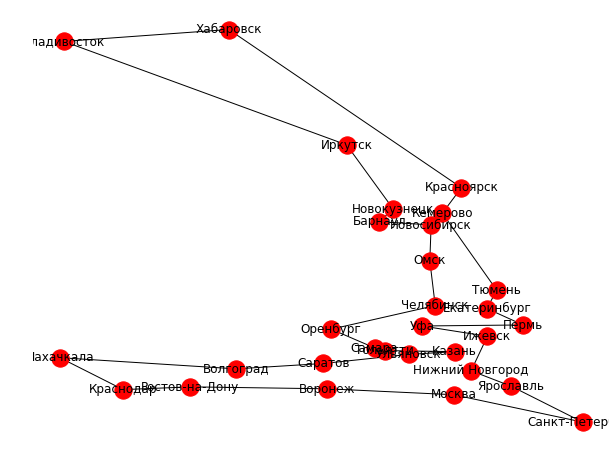

In [12]:
plt.figure(figsize=(8,6))
G = nx.Graph()

pos = {}

for item in best_data:
    pos[item[0]] = (float(item[1]), float(item[2]))

for i in range(len(best_data)):
    a = best_data[i]
    if i == len(best_data) - 1:
        b = best_data[0]
    else:
        b = best_data[i+1]
    G.add_edge(a[0], b[0])


nx.draw(G, pos=pos, with_labels=True)
plt.show()